In [51]:
from sklearn import datasets
import numpy as np

In [52]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [53]:
class LogisticRegressionGD:
    """ 
    Gradient Descent-based logistic regression classifier.

    Instead of calculating the the weights after each epoch, we are going to do it based on the entire batch.

    Parameters
    ----------
    eta: float
        Learning Rate (between 0 and 1)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Random number generator for random weight initialization

    Attributes
    ----------
    w_: 1d-array
        Weights after fitting
    b_: Scalar
        Bias unit after fitting
    errors_: list
        Number of misclassifications (updates) in each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        """
        Fit Training Data.

        Parameters
        ----------
        x: {array-like}, shape = [n_examples, n_features] // Descriptive Features
            Training vectors, where n_examples is the number of examples and n_features is the number of features
        y: array-like, shape = [n_examples]               // Target Features
            Target values

        Returns
        -------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, 
                              scale = 0.01, 
                              size = X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output))
                    - ((1-y).dot(np.log(1-output)))
                    / X.shape[0])
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """Compute linear activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        

In [54]:
from sklearn.model_selection import train_test_split
# train_test_split already shuffles the data by default
# using random_state = 1 makes sure that our results are reproducable
# stratify means that our subsets are going to have the same proportion of target class
#   labels as our input dataset
# bincount counts the number of occurances in an array, so we can verify the 
#   stratify with it
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify = y
)
print("label counts in y: ", np.bincount(y)) # dataset is evenly distributed
print("label counts in y_train: ", np.bincount(y_train))
print("label counts in y_test: ", np.bincount(y_test))

label counts in y:  [50 50 50]
label counts in y_train:  [35 35 35]
label counts in y_test:  [15 15 15]


In [55]:
from sklearn.preprocessing import StandardScaler
# Standardizes the feature variables of the dataset
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [56]:
from sklearn.linear_model import Perceptron
# Trains our perceptron model
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [57]:
# Misclassified saples from our predictions against the test values in y_test
y_pred = ppn.predict(X_test_std)
print("Misclassified examples: %d" % (y_test != y_pred).sum())

Misclassified examples: 1


In [58]:
# Accuracy rate from testing our prediction against the true values in y_test
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.978


In [59]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier, test_idx=None, resolution=0.02):

    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # Range of the first feature
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # Range of the second feature
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())                          # Sets the x limit on the plot
    plt.ylim(xx2.min(), xx2.max())                          # Sets the y limit on the plot

    # Plot class examples on the graph
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
        
    # Highlight test examples
    if test_idx:
        # Plots all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha = 1.0,
                    linewidth = 1, marker = 'o',
                    s=100, label = 'Test Set')

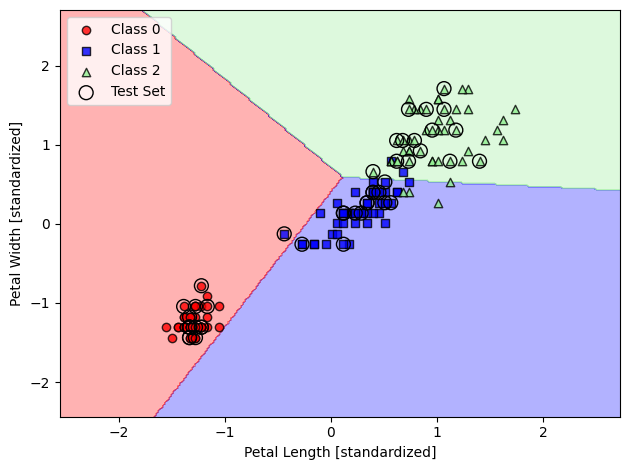

In [60]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
# print(X_combined_std)
# print(y_combined)
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
# Creates label and legend for scatterplot
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

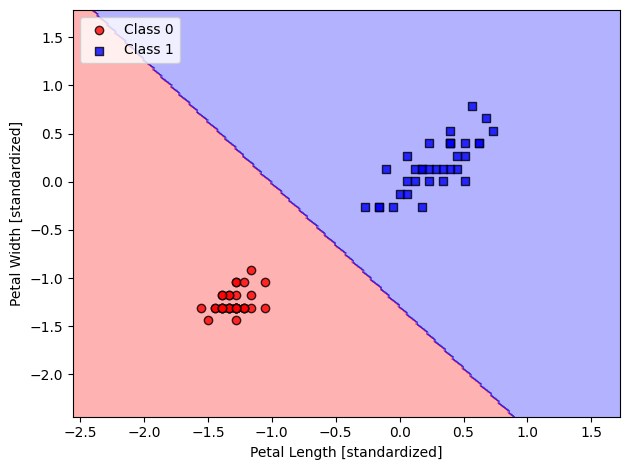

In [61]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3,
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
# Creates label and legend for scatterplot
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()